# 第13篇：可视化

一图胜千言，人是一个视觉敏感的动物，大多数人对数字无法在较短的时间内找到规律和业务意义，可视化就势在必行。

视觉化效应 (Visual effects) 是指人类认知过程中，只要将非视觉性信息转化成视觉信息，可以大大增强海马体的记忆与前额叶皮质的思维反应速度。

Pandas 的样式（Styling）和可视化图表（Charts）都可以让数据直达我们的大脑，让数据自己说话。

## 第1部分：可视化简介

### pyplot 模块

Pandas的数据可视化依赖于matplotlib模块的pyplot类，matplotlib在安装Pandas会自动安装。Matplotlib可以对图形做细节控制，绘制出出版质量级别的图形，通过Matplotlib，可以简单地绘制出常用的统计图形。

以下是约定俗的引入方法：

```python
# 约定简写为 plt
import matplotlib.pyplot as plt
```

### 其他可视化库

其他的可视化库有 Altair、Bokeh、seaborn、plotnine、IPython Vega、Plotly 等，样式比较现代、美观，本教程会分别做相关介绍。


### 颜色的表示

在可视化中颜色与 CSS 表示方法相同，可以用 CSS 颜色名和 CSS 合法颜色值表示。

17 种标准色颜色名为： aqua, black, blue, fuchsia, gray, green, lime, maroon, navy, olive, orange, purple, red, silver, teal, white, yellow。

> 颜色值的概念、表达方式、常见配色可参考 [网页常用颜色及颜色代码](https://www.gairuo.com/p/web-color)

### matplotlib 图形显示中文

在绘制图形时，图形中的文由于matplotlib未加载中文字体页显示乱码，需要对计算机做以下配置彻底解决这个问题：

1. 下载字体文件：https://www.fontpalace.com/font-download/simhei/ 。下载后打开文件点击安装，Windows也可复制到系统的fonts文件夹。
2. 查找 matplotlib 配置文件，执行以下代码可返回文件目录

```python
# 查找 matplotlib 配置文件
import matplotlib
matplotlib.matplotlib_fname()
```

进入这个目录，可以看fonts文件夹和matplotlibrc配置文件，fonts文件夹用于存放字体文件。

1. 修改配置文件，用纯文本编辑器打开matplotlibrc配置文件，修改前请备份一下。使用查找功能查到并操作
   - 将以下 font.family和 font.sans-serif 前面的#去掉
   - 在font.sans-serif:后面新增SimHei
   - 同时将找到axes.unicode_minus，将True改为False，作用就是解决负号'-'显示为方块的问题。

最终修改为：

```python
font.family         : sans-serif
font.sans-serif     : SimHei, DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
axes.unicode_minus  : False
```

1. 找到缓存文件目录并删除，Mac电脑和转到/Users/hui/.matplotlib（其中hui是你自己的电脑用户名），Windows电脑的路径为C:\Users\hui.matplotlib，将tex.cache和fontList.json等文件全删除。
2. 重启Jupyter notebook并重新执行代码

如果仍然有问题，可再增加临时代码，可能重新加一下：

```python
from matplotlib.font_manager import _rebuild

# 重新加载
_rebuild()
```

如还没解决，可重启电脑试试。

### notebook 问题

以下是可视化过程中 jupyter notebooks 一些问题的解决方案：

图形大小及正确显示中文：

```python
# jupyter notebooks plt 图表配置
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0) # 固定显示大小
plt.rcParams['font.family'] = ['sans-serif'] # 显示中文问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文问题
plt.rcParams['axes.unicode_minus'] = False # 显示负号
plt.style.use('seaborn-whitegrid') # 设置图形样式

plt.style.available # 可以得到所有可用的样式
```

页面大小控制：

```python
# jupyter notebooks 页面自适应宽度
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# 背景白色 <style>#notebook_panel {background: #ffffff;}</style>
```

嵌入页面：

```python
# jupyter notebooks 嵌入页面内容
from IPython.display import IFrame
IFrame('https://arxiv.org/pdf/1406.2661.pdf', width=800, height=450)
```


### 图片加到邮件正文

在邮件中不能直接引用图片，可使用以下方法使用图片的 base64 编码，再用 html 引用：

```python
import base64
f = open('john-lennon.jpg', 'rb')
bs64 = base64.b64encode(f.read()).decode()
img_by_html = f"<img src='data:image/png;base64,{bs64}'/>"

# 在 notebook 中查看
from IPython.core.display import display, HTML
display(HTML(img_by_html))
```

## 第2部分：plot可视化 
Pandas 提供了 plot() 方法可以快速方便地将 Series 和 DataFrame 中的数据进行可视化, 它是 matplotlib.axes.Axes.plot 的封装。代码执行后会生成一张图片，并直接显示在 notebook 上。

### 基本使用

plot 默认为折线图，折线图也是最常用和最基础的可视化图形，足以满足我们日常 80% 的需求：

```python
df.plot()
s.plot()
```

我们可以在 plot 后增加调用来使用其他的图形，当然这些图形对数据结构也有自己的要求，教程后边会逐个介绍：

```python
df.plot.line() # 折线的全写方式
df.plot.bar() # 柱状图
df.plot.barh() # 横向柱状图 （条形图）
df.plot.hist() # 直方图
df.plot.box() # 箱形图
df.plot.kde() # 核密度估计图
df.plot.density() # 同 df.plot.kde()
df.plot.area() # 面积图
df.plot.pie() # 饼图
df.plot.scatter() # 散点图
df.plot.hexbin() # 六边形箱体图，或简称六边形图
```

### 使用方法

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Series 使用
Series 使用 plot 时 x 轴为索引，y 轴为索引对应的具体值：

<AxesSubplot:>

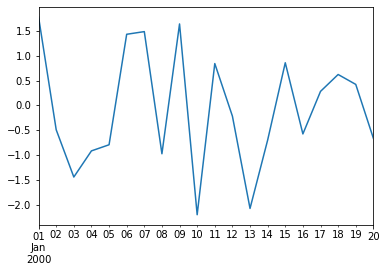

In [2]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/1/2000', periods=20)
              )

ts.plot()

#### DataFrame 使用
DataFrame 使用 plot 时 x 轴为索引，y 轴为索引对应的多个具体值：

<AxesSubplot:>

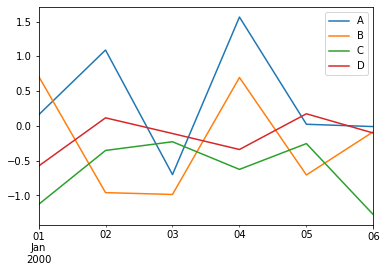

In [3]:
df = pd.DataFrame(np.random.randn(6, 4),
                  index=pd.date_range('1/1/2000', periods=6),
                  columns=list('ABCD'))
df.plot()
# <matplotlib.axes._subplots.AxesSubplot at 0x7fa4c699b490>
# 会显示折线图

#### 指定列
DataFrame 在绘图时可以指定 x 和 y 轴的列：

<AxesSubplot:xlabel='A'>

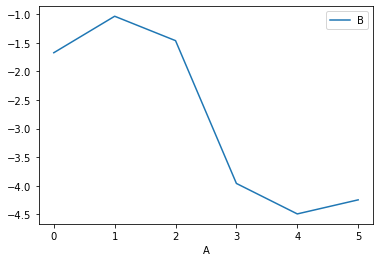

In [4]:
df2 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df2['A'] = pd.Series(list(range(len(df))))
df2.plot(x='A', y='B') # 指定 x 和 y 轴内容

如果 y 轴需要多个值，可以传入列表：

<AxesSubplot:xlabel='A'>

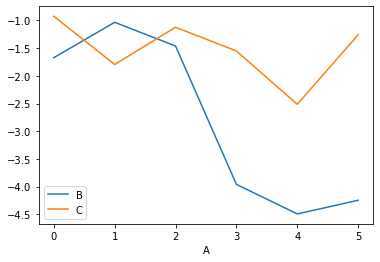

In [5]:
df2.plot(x='A', y=['B','C'])

### plot绘图参数
默认的 plot 方法可以帮助我们快速地绘制各种图形，本文介绍在使用 plot 绘图时常用的一些绘图参数。

In [6]:
df = pd.read_excel('data/team.xlsx')
df.head()

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86


#### 图形类型
df.plot() 可以通过参数来指定具体图形类型：
```python
df.plot(kind='pie') # 其他的名称和上文相同
s.plot(kind='pie')
```

#### X轴和Y轴
常用在折线图、柱状图、面积图、散点图等，如果是 Series 则索引是 x 轴，Y 轴里值，无需传入。
```python
# 可以不用写参数名，直接按位置传入
df[:5].plot('name', 'Q1')
df[:5].plot.bar('name', ['Q1', 'Q2'])
df[:5].plot.barh(x='name', y='Q4')
df[:5].plot.area('name', ['Q1', 'Q2'])
df[:5].plot.scatter('name', 'Q3')
```
注：散点图只允许有一个Y值。

#### 图形标题
图的标题：
```python
df.plot(title='my plot')
```

<AxesSubplot:title={'center':'my plot'}>

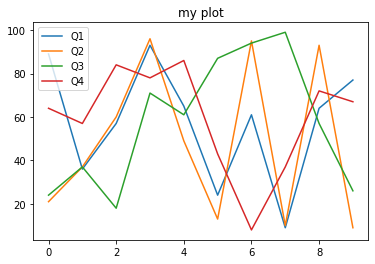

In [7]:
df[:10].plot(title="my plot")

如果需要中文支持的话可参考本章节概述部分。

#### 字体大小
指定轴上的字体大小：

<AxesSubplot:>

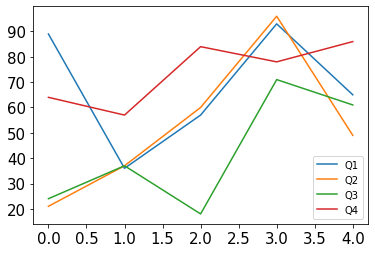

In [8]:
df[:5].plot(fontsize=15)

#### 线条样式
style 可指定图的线条等样式，可参考可选的值 Matplotlib Line-style：
```python
df[:5].plot(style=':') # 虚线
df[:5].plot(style='-.') # 虚实相间
df[:5].plot(style='--') # 长虚线
df[:5].plot(style='-') # 实线（默认）
df[:5].plot(style='.') # 点
df[:5].plot(style='*-') # 实线，数值为星星
df[:5].plot(style='^-') # 实线，数值为三角形
```
对不同线分别给样式：
```python
df[:5].plot(style=[':', '--', '.-', '*-'])
```

<AxesSubplot:xlabel='name'>

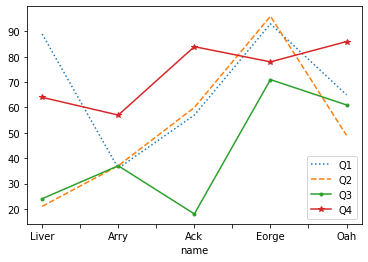

In [9]:
df[:5].set_index('name').plot(style=[':', '--', '.-', '*-'])

#### 背景辅助线
grid 会给 x 方向和 y 方向增加灰色辅助线：
```python
df[:5].plot(grid=True)
```

<AxesSubplot:xlabel='name'>

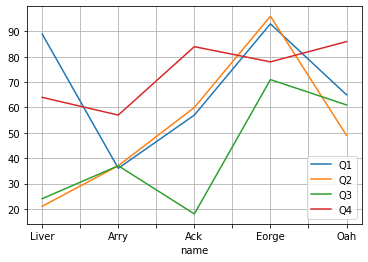

In [10]:
df[:5].set_index('name').plot(grid=True)

#### 图例
可以取消图例：
```python
df[:5].plot(legend=False)
```
可以反向排序图例：
```python
df[:5].plot(legend='reverse') 
```

#### 图形大小
figsize 参数传入一个元组，可以指定图形的宽高英寸值。
```python
df[:5].plot.bar(figsize=(10.5,5))
```
当然可以给出全局默认的图形大小：
```python
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 8.0) # 固定显示大小
```

#### 色系
colormap 指定图形的配色，具体值可参考Matplotlib 库的色系表：
```python
df[:5].plot.barh(colormap='rainbow') 
```

<AxesSubplot:xlabel='name'>

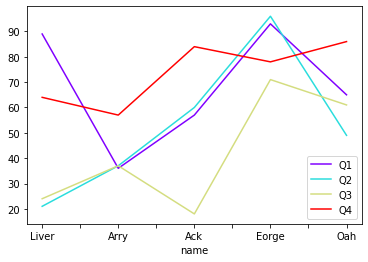

In [11]:
df[:5].set_index('name').plot(colormap='rainbow')

#### 指定绘图引擎
backend 参数可以指定一个新的绘图引擎，默认使用的是 matplotlib。
```python
# 使用 bokeh
import pandas_bokeh
pandas_bokeh.output_notebook() # notebook 展示
df[:15].plot.bar('name', ['Q1', 'Q2'], backend='pandas_bokeh')
```

In [12]:
import pandas_bokeh
pandas_bokeh.output_notebook() # notebook 展示
df[:15].plot.bar('name', ['Q1', 'Q2'], backend='pandas_bokeh')

Loading BokehJS ...

Figure(id='1038', ...)

In [13]:
df[:5].set_index('name').plot(backend='pandas_bokeh')

Figure(id='1147', ...)

#### matplotlib 其他参数
此外，还支持 matplotlib 库中的其他参数， 参见。
```python
df[:10].plot.line(color='k') # 图的颜色
df[:5].plot.bar(rot=45) # 主轴上文字的方向度数 
```

<AxesSubplot:>

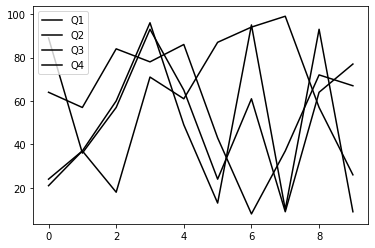

In [14]:
df[:10].plot.line(color='k')

<AxesSubplot:>

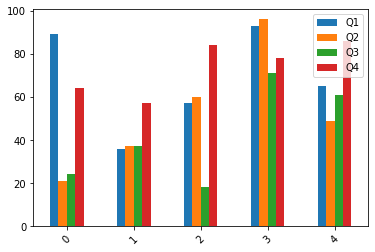

In [15]:
df[:5].plot.bar(rot=45)

### 折线图
折线图（Line Chart）折线图是用线条段将各数据点连接起来而组成的图形，它能表达一个数据的走势，一般和时间相关。

#### 基础用法
Plot 的默认图形是折线图，可以省略 df.plot.line() 中具体的图形 line 方法。

DataFrame 可以直接调用 plot 生成折线图，其中，x 轴为索引，其他数字类型的列为 y 轴上的线条。
```python
df.plot()
df.plot.line() # 全写方式
```
基于以上的逻辑，如果希望指定指定列为 x 轴，可以先将其设为索引：

<AxesSubplot:xlabel='name'>

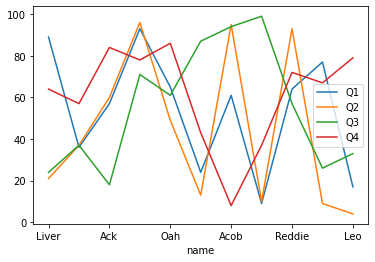

In [16]:
(
    df.loc[:10] # 取部分
    .set_index('name') # 设为索引
    .plot() # 折线图
)

Series 索引为 x 轴，值为 y 轴， 值为非数字的会报错

<AxesSubplot:>

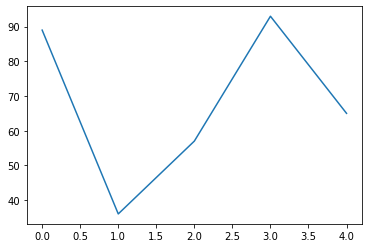

In [17]:
df[:5].Q1.plot()

#### 相关参数
可以指定 x 轴和 y 轴：

<AxesSubplot:xlabel='name'>

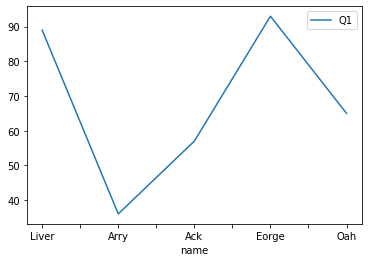

In [18]:
df[:5].plot(x='name', y='Q1')

<AxesSubplot:xlabel='name'>

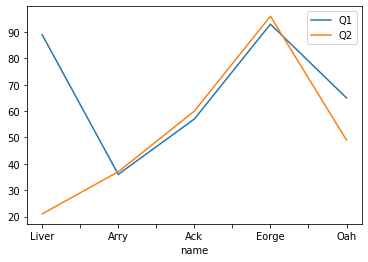

In [19]:
df[:5].plot('name', ['Q1', 'Q2']) # 指定多条

其他使用方法可参考Plot 绘图参数。

#### 子图
如果一个折线图中有多条，可以使用 subplots 来将它们分开，形成多个子图。

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

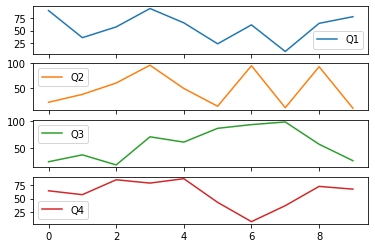

In [20]:
df[:10].plot.line(subplots=True)

### 饼图
饼图（Pie Chart）广泛得应用在各个领域，用于表示不同分类的占比情况，通过弧度大小来对比各种分类。饼图通过将一个圆饼按照分类的占比划分成多个区块，整个圆饼代表数据的总量，每个区块（圆弧）表示该分类占总体的比例大小，所有区块（圆弧）的加和等于 100%。

#### 创建办法
您可以使用 DataFrame.plot.pie() 或 Series.plot.pie() 创建饼图。 如果您的数据包含任何 NaN，它们将自动填充 0。如果您的数据中有任何负值，则会引发 ValueError。

<AxesSubplot:ylabel='series'>

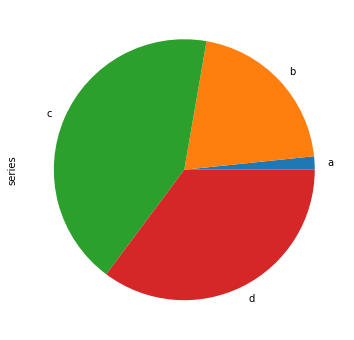

In [21]:
s = pd.Series(3 * np.random.rand(4),
              index=['a', 'b', 'c', 'd'], name='series')
s.plot.pie(figsize=(6, 6))

DataFrame 需要指定 y 值：

<AxesSubplot:ylabel='x'>

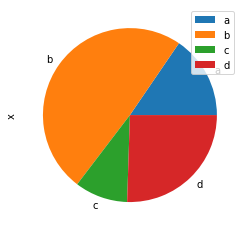

In [22]:
df = pd.DataFrame(3 * np.random.rand(4, 2),
                  index=['a', 'b', 'c', 'd'],
                  columns=['x', 'y'])

df.plot.pie(y='x')

如果传递的总和小于 1.0，则 matplotlib 将绘制一个扇形。

<AxesSubplot:ylabel='series2'>

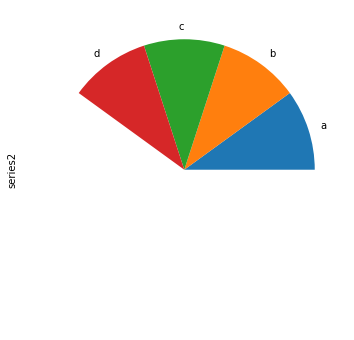

In [23]:
series = pd.Series([0.1] * 4,
                   index=['a', 'b', 'c', 'd'],
                   name='series2')
series.plot.pie(figsize=(6, 6),normalize=False)

#### 子图
DataFrame 可以传入 subplots=True 创建子图矩阵：

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

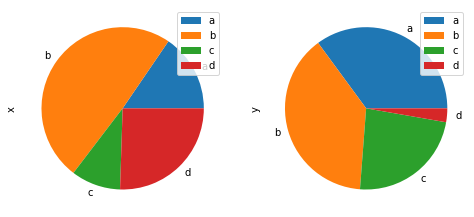

In [24]:
df.plot.pie(subplots=True, figsize=(8, 4))

#### 图例
默认是有图例的，但饼图一般可以不需要图例, legend=False：

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

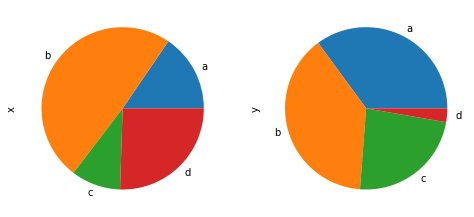

In [25]:
df.plot.pie(subplots=True, figsize=(8, 4), legend=False)

#### 其他常用参数
如下：

<AxesSubplot:ylabel='series'>

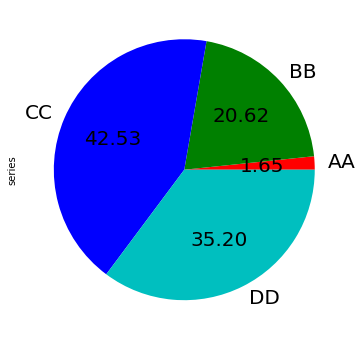

In [26]:
s.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], # 标签，指定项目名称
           colors=['r', 'g', 'b', 'c'], # 指定颜色
           autopct='%.2f', # 数字格式
           fontsize=20, # 字体大小
           figsize=(6, 6) # 图大小
          )

更多参数参见 [matplotlib pie 官方文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie)。

### 柱状图
柱状图（bar chart），使用与轴垂直的柱子，通过柱形的高低来表达数据的多少，适用于数据的对比，在整体中也能看到数据的发展变化趋势。

#### 基础用法
DataFrame 可以直接调用 plot.bar() 生成折线图，与折线图类似，x 轴为索引，其他数字类型的列为 y 轴上的条形。
```python
df.plot.bar()
df.plot.barh() # 横向
```

In [27]:
df = pd.read_excel('data/team.xlsx')
df.head()

,name,team,Q1,Q2,Q3,Q4
0,Liver,E,89,21,24,64
1,Arry,C,36,37,37,57
2,Ack,A,57,60,18,84
3,Eorge,C,93,96,71,78
4,Oah,D,65,49,61,86


<AxesSubplot:xlabel='name'>

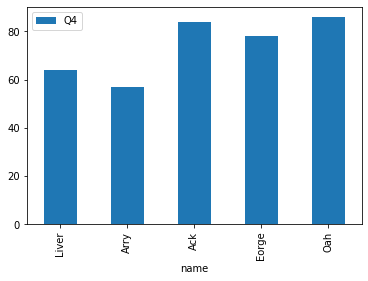

In [28]:
df[:5].plot.bar(x='name', y='Q4') # 指定xy轴

<AxesSubplot:xlabel='name'>

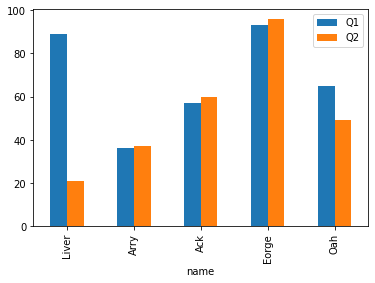

In [29]:
df[:5].plot.bar('name', ['Q1', 'Q2']) # 指定xy轴

基于以上的逻辑，如果希望指定指定列为 x 轴，可以先将其设为索引

<AxesSubplot:xlabel='name'>

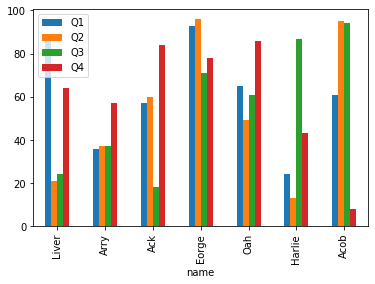

In [30]:
(
    df.loc[:6] # 取部分
    .set_index('name') # 设为索引
    .plot
    .bar() # 柱状图
)

Series 索引为 x 轴，值为 y 轴， 值为非数字的会报错：

<AxesSubplot:>

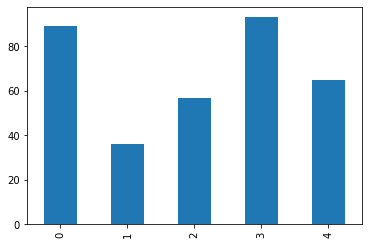

In [31]:
df[:5].Q1.plot.bar()

#### 负值情况
正负值同时出现的情况：

<AxesSubplot:xlabel='name'>

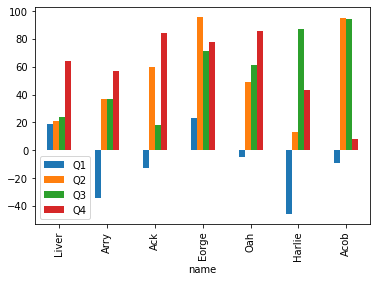

In [32]:
(
    df.assign(Q1=df.Q1-70) # 让Q1产生部分负值
    .loc[:6] # 取部分
    .set_index('name') # 设为索引
    .plot
    .bar() # 柱状图
)

#### 堆叠
可以将同一索引的多个数据堆叠起来：

<AxesSubplot:xlabel='name'>

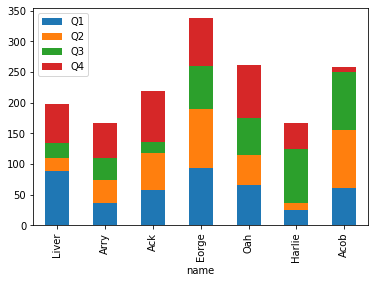

In [33]:
(
    df.loc[:6] # 取部分
    .set_index('name') # 设为索引
    .plot
    .bar(stacked=True) # 柱状图, 堆叠
)

#### barh 横向
barh 可以将柱形横向，以下为一个横向+堆叠的例子：

<AxesSubplot:ylabel='name'>

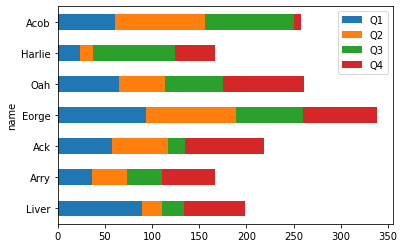

In [34]:
(
    df.loc[:6] # 取部分
    .set_index('name') # 设为索引
    .plot
    .barh(stacked=True) # 柱状图, 横向+堆叠
)

#### 子图
和折线图一样，也支持子图：

array([<AxesSubplot:title={'center':'Q1'}>,
       <AxesSubplot:title={'center':'Q2'}>,
       <AxesSubplot:title={'center':'Q3'}>,
       <AxesSubplot:title={'center':'Q4'}>], dtype=object)

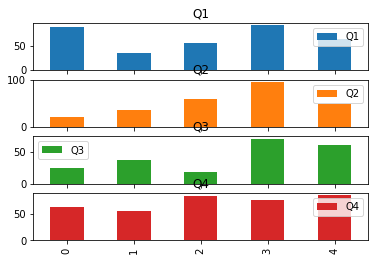

In [35]:
df[:5].plot.bar(subplots=True)

### 直方图
直方图(Histogram)，又称质量分布图，是一种统计报告图，由一系列高度不等的纵向条纹或线段表示数据分布的情况。 一般用横轴表示数据类型，纵轴表示分布情况。

#### 直方图的意义
直方图描述的是数据在不同区间内的分布情况，描述的数据量一般比较大，图示如下：
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/pandas-plot-hist-01.png)
分组数据字段（统计结果）映射到横轴的位置，频数字段（统计结果）映射到矩形的高度，分类数据可以设置颜色增强分类的区分度。

#### 使用方法
我们随机生成三列数，每列 1000 个，其中一个在随机数上加一，一个减一：

In [36]:
df2 = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns=['a', 'b', 'c'])

绘制直方图，默认分箱数为 10 个 （bins=10），alpha 为颜色的透明度，取 0 - 1 范围：

<AxesSubplot:ylabel='Frequency'>

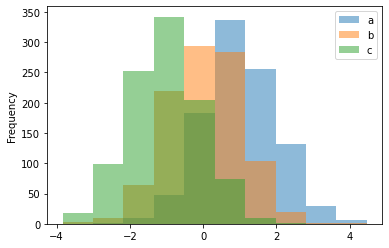

In [37]:
df2.plot.hist(alpha=0.5)

Series 为单直方图:

<AxesSubplot:ylabel='Frequency'>

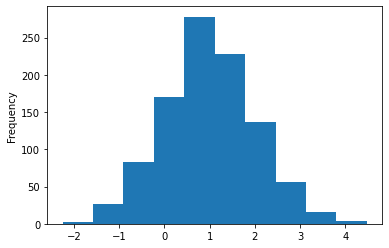

In [38]:
df2.a.plot.hist()

#### 堆叠
可以堆叠，并指定分箱数量：

<AxesSubplot:ylabel='Frequency'>

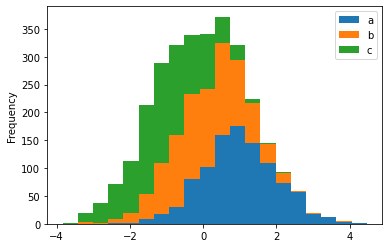

In [39]:
df2.plot.hist(stacked=True, bins=20)

#### df.hist
也可以直接使用 df.hist(alpha=0.5) 来绘制三个子图：

array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

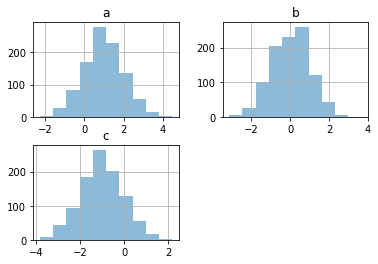

In [40]:
df2.hist(alpha=0.5)

也可以单独绘制子图，指定分箱数量：

<AxesSubplot:>

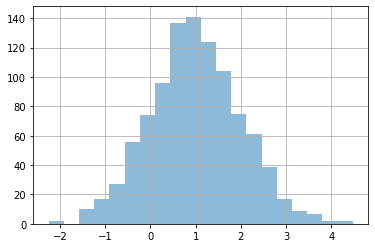

In [41]:
df2.a.hist(bins=20, alpha=0.5)

array([[<AxesSubplot:title={'center':'a'}>]], dtype=object)

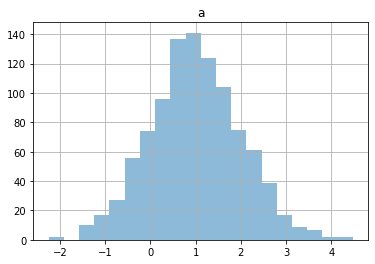

In [42]:
df2.hist('a', bins=20, alpha=0.5) # 同上

by 参数可以做分组，生成分组后的子图：

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>]], dtype=object)

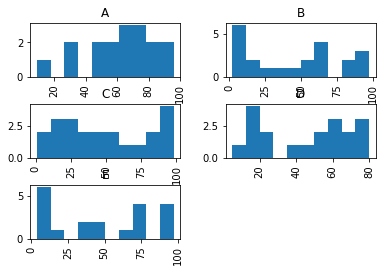

In [43]:
df.Q1.hist(by=df.team)

#### 其他参数
您可以传递 matplotlib hist 支持的其他关键字。 例如，水平和累积直方图可以通过“方向为水平”和“累积为真”来绘制。参考 matplotlib hist 官方文档。

<AxesSubplot:xlabel='Frequency'>

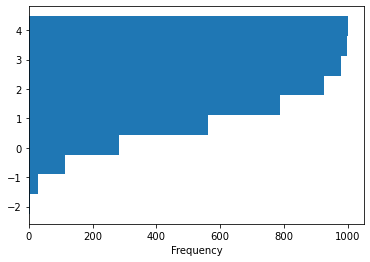

In [44]:
df2['a'].plot.hist(orientation='horizontal', cumulative=True)

#### 例子
当我们绘制骰子6000次时，我们期望每个值大约获得1000次。 但是，当我们绘制两个骰子并将结果相加时，分布将完全不同。 直方图说明了这些分布：

<AxesSubplot:ylabel='Frequency'>

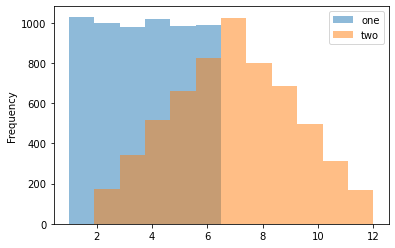

In [45]:
df = pd.DataFrame(np.random.randint(1, 7, 6000),
                  columns = ['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df.plot.hist(bins=12, alpha=0.5)

### 箱型图
箱形图（Box Chart）又称盒须图、盒式图或箱线图，是一种用作显示一组数据分布情况的统计图。Series.plot.box() 、 DataFrame.plot.box(), 和 DataFrame.boxplot() 都可以绘制箱形图。

#### 作用
从箱形图中我们可以观察到：

- 一组数据的关键值：中位数、最大值、最小值等。
- 数据集中是否存在异常值，以及异常值的具体数值。
- 是否是对称的。
- 数据的分布是否密集、集中。
- 是否扭曲，即是否有偏向性。

#### 基本用法
有以下使用方法：
```python
df = pd.DataFrame(np.random.rand(10, 5),
                  columns=['A', 'B', 'C', 'D', 'E'])
df.boxplot() # 所有列
df.boxplot('A') # 单列
```

In [46]:
df = pd.DataFrame(np.random.rand(10, 5),
                  columns=['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.061433,0.282601,0.042560,0.447830,0.632959
1,0.613014,0.136300,0.150881,0.072259,0.029175
2,0.469467,0.152585,0.561809,0.845916,0.911097
3,0.046277,0.465030,0.739419,0.283219,0.291308
4,0.639930,0.859275,0.923874,0.739966,0.441049


<AxesSubplot:>

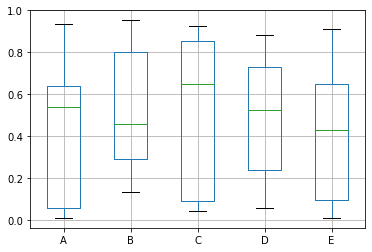

In [47]:
df.boxplot()

<AxesSubplot:>

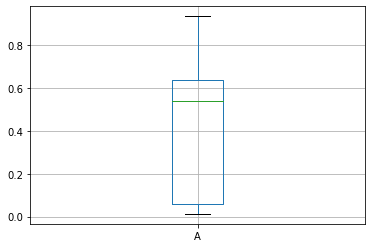

In [48]:
df.boxplot('A')

#### 配色
给图形中的一些元素指定颜色：

<AxesSubplot:>

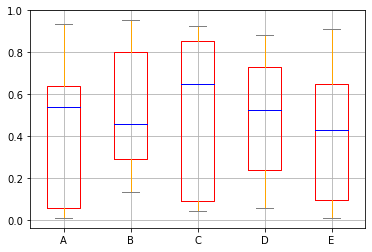

In [49]:
color = {'boxes': 'red', # 箱体颜色
         'whiskers': 'orange', # 连线颜色
         'medians': 'Blue', # 中位数颜色
         'caps': 'Gray'} # 极值颜色

df.boxplot(color=color, sym='r+')

#### 其他参数
vert=False 将图形横向，positions 控制位置：

<AxesSubplot:>

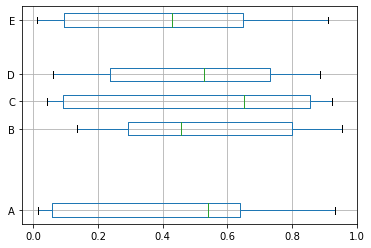

In [50]:
df.boxplot(vert=False, positions=[1, 4, 5, 6, 8])

更多功能可参考[官方文档](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot)。

### 面积图
面积图（Area Chart），又叫区域图。 将折线图中折线与自变量坐标轴之间的区域使用颜色或者纹理填充，这样一个填充区域我们叫做面积，颜色的填充可以更好的突出趋势信息，需要注意的是颜色要带有一定的透明度，透明度可以很好的帮助使用者观察不同序列之间的重叠关系，没有透明度的面积会导致不同序列之间相互遮盖减少可以被观察到的信息。

面积图默认情况下是堆叠的。 要生成堆积面积图，每列必须全部为正值或全部为负值。

当输入数据包含NaN时，它将自动填充0。如果要删除或填充不同的值，请在调用图之前使用 dataframe.dropna() 或 dataframe.fillna() 。

#### 创建方法
Series.plot.area() 和 DataFrame.plot.area() 是面积图的基础操作，默认情况下 x 轴为索引，y 轴为值或者所有数字列。

<AxesSubplot:>

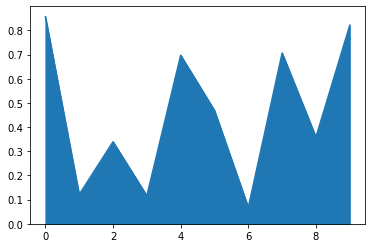

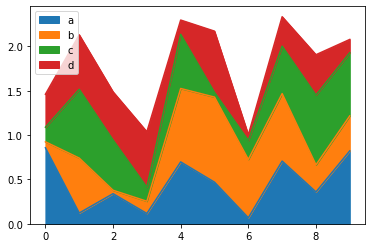

In [51]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.a.plot.area() # 单个列
df.plot.area()

#### 堆积
要生成未堆积的图，请传入 stack = False，除非另有说明，否则Alpha值将设置为0.5。

<AxesSubplot:>

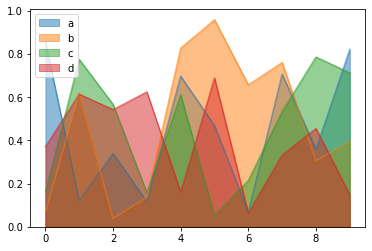

In [52]:
df.plot.area(stacked=False)

#### 指定轴
可以指定 x 和 y 轴：

<AxesSubplot:>

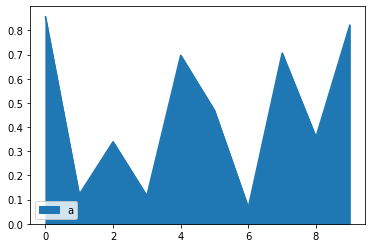

In [53]:
df.plot.area(y='a')

<AxesSubplot:>

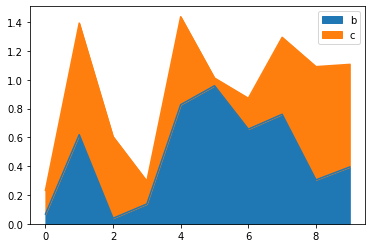

In [54]:
df.plot.area(y=['b', 'c'])

<AxesSubplot:xlabel='a'>

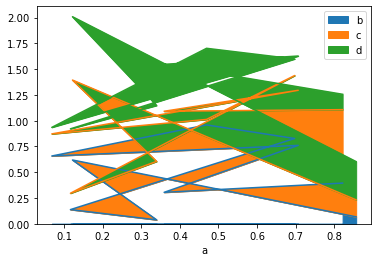

In [55]:
df.plot.area(x='a')

### 散点图
散点图（Scatter graph）也叫 X-Y 图，它将所有的数据以点的形式展现在直角坐标系上，以显示变量之间的相互影响程度，点的位置由变量的数值决定。

#### 图形意义
通过观察散点图上数据点的分布情况，我们可以推断出变量间的相关性。如果变量之间不存在相互关系，那么在散点图上就会表现为随机分布的离散的点，如果存在某种相关性，那么大部分的数据点就会相对密集并以某种趋势呈现。数据的相关关系主要分为：正相关（两个变量值同时增长）、负相关（一个变量值增加另一个变量值下降）、不相关、线性相关、指数相关等，表现在散点图上的大致分布如下图所示。那些离点集群较远的点我们称为离群点或者异常点。

散点图经常与回归线（就是最准确地贯穿所有点的线）结合使用，归纳分析现有数据以进行预测分析。
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/pandas-plot-scatter-01.jpg)

#### 创建方法
可以使用 DataFrame.plot.scatter() 方法绘制散点图。 散点图要求 x 和 y 轴为数字列。这些可以通过 x 和 y 关键字指定。

<AxesSubplot:xlabel='a', ylabel='b'>

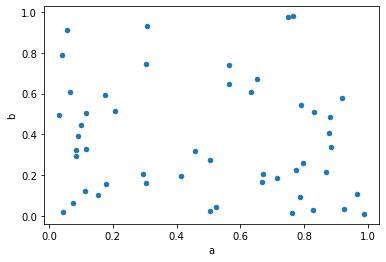

In [56]:
df = pd.DataFrame(np.random.rand(50, 4),
                  columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x='a', y='b')

#### 多组数据
要在单个轴上绘制多个列组，请重复指定目标轴的绘图方法。 建议指定颜色和标签关键字以区分每个组。

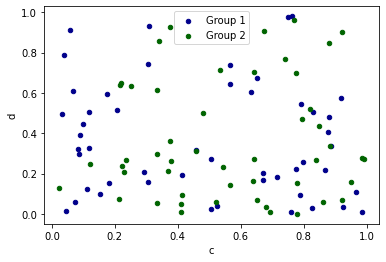

In [57]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

#### 点的颜色
c 参数可以指定点的颜色。

<AxesSubplot:xlabel='a', ylabel='b'>

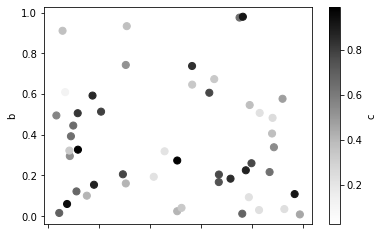

In [58]:
df.plot.scatter(x='a', y='b', c='c', s=50)

c 的取值可以是：

- 字符，RGB 或者 RGBA 码, 如 ‘red’ ， ‘#a98d19’
- 序列，颜色列表，对应每个点的颜色
- 列名称或位置，其值将用于根据颜色图为标记点着色

<AxesSubplot:xlabel='a', ylabel='b'>

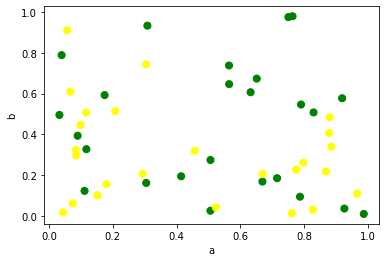

In [59]:
df.plot.scatter(x='a', y='b', c=['green','yellow']*25, s=50)

<AxesSubplot:xlabel='a', ylabel='b'>

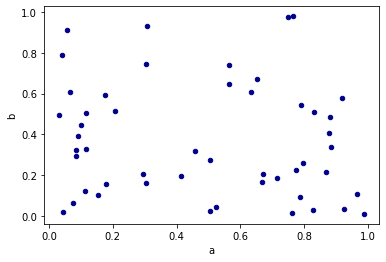

In [60]:
df.plot.scatter(x='a', y='b', c='DarkBlue')

<AxesSubplot:xlabel='a', ylabel='b'>

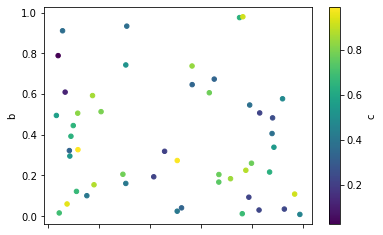

In [61]:
df.plot.scatter(x='a', y='b', c='c', colormap='viridis')

#### 色阶栏
colorbar=True 在当前坐标区或图的右侧显示一个垂直颜色栏。颜色栏显示当前颜色图并指示数据值到颜色图的映射。

<AxesSubplot:xlabel='a', ylabel='b'>

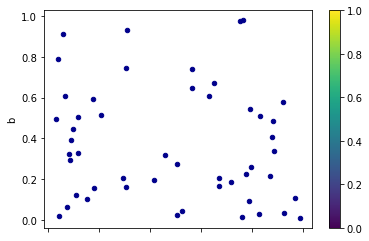

In [62]:
df.plot.scatter(x='a', y='b', c='DarkBlue', colorbar=True)

#### 点大小
s 可以指定点的大小：

<AxesSubplot:xlabel='a', ylabel='b'>

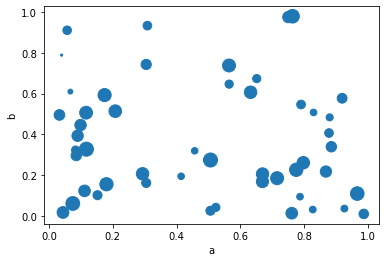

In [63]:
df.plot.scatter(x='a', y='b', s=df['c'] * 200)

<AxesSubplot:xlabel='a', ylabel='b'>

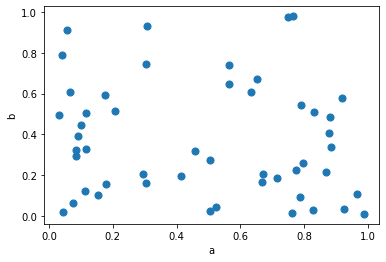

In [64]:
df.plot.scatter(x='a', y='b', s=50) # 同样大小

其他参数
可以参考{官方文档](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html)了解更多参数。

### 六边形分箱图
六边形分箱图（Hexagonal Binning），也称六边形箱体图，或简称六边形图，是一种由六边形为主要元素的统计图表。它是一种比较特殊的图表，既是散点图的延伸，又兼具直方图和热力图的特征。

#### 创建方法
您可以使用 DataFrame.plot.hexbin() 创建六边形图。 如果您的数据过于密集而无法单独绘制每个点，则六边形图可以替代散点图。
```python
df = pd.DataFrame(np.random.randn(1000, 2), columns=["A", "B"])
df["B"] = df["B"] + np.arange(1000)
df.plot.hexbin(x="A", y="B", gridsize=10)
```
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/hexbin_fig1.png)

一个有用的关键字参数是gridsize。 它控制x方向上的六边形数量，默认为100。较大的网格尺寸意味着更多更小的箱体。

#### 其他参数
默认情况下，将计算每个（x，y）点周围的计数的直方图。 您可以通过将值传递给C和reduce_C_function 参数来指定备用聚合。 C 指定每个（x，y）点的值，reduce_C_function 是一个参数的函数，该参数将 bin 中的所有值减少为一个数字（例如，平均值，最大值，总和，标准差）。 在此示例中，位置由列 a 和 b 给出，而值由列 z 给出。 每个箱会使用 NumPy 的 max 函数进行汇总。
```python
n = 500
df = pd.DataFrame({
    'coord_x': np.random.uniform(-3, 3, size=n),
    'coord_y': np.random.uniform(30, 50, size=n),
    'observations': np.random.randint(1,5, size=n)
    })
ax = df.plot.hexbin(x='coord_x',
                    y='coord_y',
                    C='observations',
                    reduce_C_function=np.sum,
                    gridsize=10,
                    cmap="viridis")
```
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/Python/blog/hexbin_fig2.png)

更多参数及方法访问 [matplotlib hexbin 官方文档](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hexbin)。